In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('input/MoMAExhibitions1929to1989.csv', encoding='latin-1')
pd.options.display.max_columns = 0

In [13]:
df.head(150)

,ExhibitionID,ExhibitionNumber,ExhibitionTitle,ExhibitionCitationDate,ExhibitionBeginDate,ExhibitionEndDate,ExhibitionSortOrder,ExhibitionURL,ExhibitionRole,ExhibitionRoleinPressRelease,ConstituentID,ConstituentType,DisplayName,AlphaSort,FirstName,MiddleName,LastName,Suffix,Institution,Nationality,ConstituentBeginDate,ConstituentEndDate,ArtistBio,Gender,VIAFID,WikidataID,ULANID,ConstituentURL
0,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,moma.org/calendar/exhibitions/1767,Curator,Director,9168.0,Individual,"Alfred H. Barr, Jr.",Barr Alfred H. Jr.,Alfred,H.,Barr,Jr.,NaN,American,1902.0,1981.0,"American, 19021981",Male,109252853.0,Q711362,500241556.0,moma.org/artists/9168
1,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,moma.org/calendar/exhibitions/1767,Artist,Artist,1053.0,Individual,Paul Cézanne,Cézanne Paul,Paul,NaN,Cézanne,NaN,NaN,French,1839.0,1906.0,"French, 18391906",Male,39374836.0,Q35548,500004793.0,moma.org/artists/1053
2,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,moma.org/calendar/exhibitions/1767,Artist,Artist,2098.0,Individual,Paul Gauguin,Gauguin Paul,Paul,NaN,Gauguin,NaN,NaN,French,1848.0,1903.0,"French, 18481903",Male,27064953.0,Q37693,500011421.0,moma.org/artists/2098
3,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,moma.org/calendar/exhibitions/1767,Artist,Artist,2206.0,Individual,Vincent van Gogh,Gogh Vincent van,Vincent,NaN,van Gogh,NaN,NaN,Dutch,1853.0,1890.0,"Dutch, 18531890",Male,9854560.0,Q5582,500115588.0,moma.org/artists/2206
4,2557.0,1,"Cézanne, Gauguin, Seurat, Van Gogh","[MoMA Exh. #1, November 7-December 7, 1929]",11/7/1929,12/7/1929,1.0,moma.org/calendar/exhibitions/1767,Artist,Artist,5358.0,Individual,Georges-Pierre Seurat,Seurat Georges-Pierre,Georges-Pierre,NaN,Seurat,NaN,NaN,French,1859.0,1891.0,"French, 18591891",Male,24608076.0,Q34013,500008873.0,moma.org/artists/5358
5,2724.0,2,Paintings by 19 Living Americans,"[MoMA Exh. #2, December 12-January 12, 1930]",12/12/1929,1/12/1930,2.0,moma.org/calendar/exhibitions/1912,Artist,Artist,870.0,Individual,Charles Burchfield,Burchfield Charles,Charles,NaN,Burchfield,NaN,NaN,American,1893.0,1967.0,"American, 18931967",Male,34533792.0,Q3349279,500015189.0,moma.org/artists/870
6,2724.0,2,Paintings by 19 Living Americans,"[MoMA Exh. #2, December 12-January 12, 1930]",12/12/1929,1/12/1930,2.0,moma.org/calendar/exhibitions/1912,Artist,Artist,1490.0,Individual,Charles Demuth,Demuth Charles,Charles,NaN,Demuth,NaN,NaN,American,1883.0,1935.0,"American, 18831935",Male,29542716.0,Q380494,500004441.0,moma.org/artists/1490
7,2724.0,2,Paintings by 19 Living Americans,"[MoMA Exh. #2, December 12-January 12, 1930]",12/12/1929,1/12/1930,2.0,moma.org/calendar/exhibitions/1912,Artist,Artist,1537.0,Individual,Preston Dickinson,Dickinson Preston,Preston,NaN,Dickinson,NaN,NaN,American,1889.0,1930.0,"American, 18891930",Male,25491785.0,Q3402687,500124280.0,moma.org/artists/1537
8,2724.0,2,Paintings by 19 Living Americans,"[MoMA Exh. #2, December 12-January 12, 1930]",12/12/1929,1/12/1930,2.0,moma.org/calendar/exhibitions/1912,Artist,Artist,1832.0,Individual,Lyonel Feininger,Feininger Lyonel,Lyonel,NaN,Feininger,NaN,NaN,American,1871.0,1956.0,"American, 18711956",Male,49225327.0,Q158255,500115308.0,moma.org/artists/1832
9,2724.0,2,Paintings by 19 Living Americans,"[MoMA Exh. #2, December 12-January 12, 1930]",12/12/1929,1/12/1930,2.0,moma.org/calendar/exhibitions/1912,Artist,Artist,2519.0,Individual,"George Overbury (""Pop"") Hart","Hart George Overbury (""Pop"")",George,"Overbury (""Pop"")",Hart,NaN,NaN,American,1868.0,1933.0,"American, 18681933",Male,61822646.0,Q19795994,500027420.0,moma.org/artists/2519


In [5]:
df.shape

(34558, 28)

## Identificación del volumen de valores nulos

In [6]:
df.isna().sum()

ExhibitionID                      429
ExhibitionNumber                    0
ExhibitionTitle                     0
ExhibitionCitationDate              1
ExhibitionBeginDate                 0
ExhibitionEndDate                1204
ExhibitionSortOrder                 0
ExhibitionURL                     433
ExhibitionRole                    134
ExhibitionRoleinPressRelease      134
ConstituentID                     514
ConstituentType                   134
DisplayName                       134
AlphaSort                         134
FirstName                        3059
MiddleName                      30754
LastName                         2560
Suffix                          34401
Institution                     32100
Nationality                      8486
ConstituentBeginDate             9268
ConstituentEndDate              14739
ArtistBio                        8469
Gender                           8762
VIAFID                           7562
WikidataID                      12317
ULANID      

## Análisis del tipo de valores por columna

In [7]:
df.dtypes

ExhibitionID                    float64
ExhibitionNumber                 object
ExhibitionTitle                  object
ExhibitionCitationDate           object
ExhibitionBeginDate              object
ExhibitionEndDate                object
ExhibitionSortOrder             float64
ExhibitionURL                    object
ExhibitionRole                   object
ExhibitionRoleinPressRelease     object
ConstituentID                   float64
ConstituentType                  object
DisplayName                      object
AlphaSort                        object
FirstName                        object
MiddleName                       object
LastName                         object
Suffix                           object
Institution                      object
Nationality                      object
ConstituentBeginDate            float64
ConstituentEndDate              float64
ArtistBio                        object
Gender                           object
VIAFID                          float64


## Análisis de la columna del género de los artistas

En esta columna encontramos 8762 valores nulos que clasificaremos como unknown.  
El resto se clasifican adecuadamente en Female or Male.

In [15]:
df["Gender"].value_counts()

Male      23268
Female     2527
male          1
Name: Gender, dtype: int64

## Procedencia de los artistas (podría no coincidir con sus lugares de origen)

Igual que en casos anteriores, encontramos registros incompletos (8486) que serán tratados como "desconocidos".

In [10]:
df["Nationality"].value_counts()

American                 14112
French                    3767
German                    1741
British                   1156
Italian                    848
Spanish                    669
Mexican                    394
Dutch                      386
Swiss                      379
Russian                    356
Japanese                   318
Austrian                   256
Belgian                    204
Canadian                   126
Swedish                    109
Polish                     108
Chilean                     97
Nationality unknown         93
Brazilian                   87
Czech                       85
Argentine                   77
Cuban                       71
Danish                      60
Finnish                     58
Norwegian                   49
Venezuelan                  38
Australian                  34
Hungarian                   34
English                     33
Israeli                     29
                         ...  
Chinese                      6
Flemish 

<AxesSubplot:>

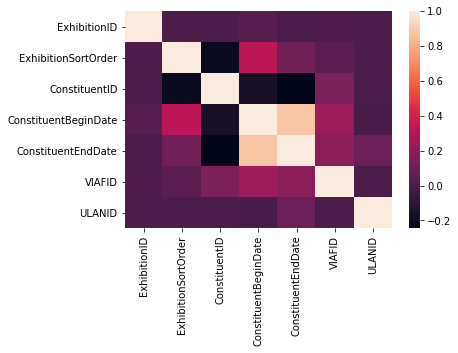

In [11]:
sns.heatmap(df.corr())